Objetivo: Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

Descripción del Dataset: El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.

In [1]:
import pandas as pd
import numpy as np


In [2]:
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/core_xgboost/heart_disease_uci.csv'
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Descripción del Dataset de enfermedades del corazón de la UCI



# Descripción del Dataset de Enfermedades Cardíacas

Este dataset contiene información clínica y demográfica de **920 pacientes**, utilizada para el análisis y predicción de enfermedades cardíacas. Los datos combinan atributos numéricos y categóricos, y presenta algunos valores faltantes que deben ser tratados para su análisis efectivo.

## Información General

- **Total de registros**: 920
- **Total de columnas**: 16
- **Tipo de problema**: Clasificación (variable objetivo: `num`)
- **Fuente potencial**: Combinación de distintos datasets relacionados con estudios cardíacos

## Columnas

| #  | Columna   | Tipo de dato | Descripción                                                                 |
|----|-----------|--------------|-----------------------------------------------------------------------------|
| 0  | `id`      | int64        | Identificador único del paciente                                            |
| 1  | `age`     | int64        | Edad del paciente                                                           |
| 2  | `sex`     | object       | Sexo del paciente (`male`, `female`, etc.)                                 |
| 3  | `dataset` | object       | Nombre del dataset original de donde proviene el registro                  |
| 4  | `cp`      | object       | Tipo de dolor en el pecho (`typical`, `atypical`, `non-anginal`, etc.)     |
| 5  | `trestbps`| float64      | Presión arterial en reposo (mm Hg)                                         |
| 6  | `chol`    | float64      | Nivel de colesterol sérico (mg/dl)                                         |
| 7  | `fbs`     | object       | Glucemia en ayunas > 120 mg/dl (`true` o `false`)                          |
| 8  | `restecg` | object       | Resultados del electrocardiograma en reposo                                |
| 9  | `thalch`  | float64      | Frecuencia cardíaca máxima alcanzada                                       |
|10  | `exang`   | object       | Angina inducida por ejercicio (`yes` o `no`)                               |
|11  | `oldpeak` | float64      | Depresión del ST inducida por ejercicio respecto al reposo                 |
|12  | `slope`   | object       | Pendiente del segmento ST durante el esfuerzo físico                       |
|13  | `ca`      | float64      | Número de vasos coloreados por fluoroscopía (0-3)                          |
|14  | `thal`    | object       | Tipo de talasemia (`normal`, `fixed defect`, `reversible defect`)          |
|15  | `num`     | int64        | Diagnóstico de enfermedad cardíaca (0: sin enfermedad, 1-4: grados)        |

## Valores Nulos

El dataset contiene valores faltantes en las siguientes columnas:

| Columna   | Valores no nulos | Total | Faltantes |
|-----------|------------------|-------|-----------|
| `trestbps`| 861              | 920   | 59        |
| `chol`    | 890              | 920   | 30        |
| `fbs`     | 830              | 920   | 90        |
| `restecg` | 918              | 920   | 2         |
| `thalch`  | 865              | 920   | 55        |
| `exang`   | 865              | 920   | 55        |
| `oldpeak` | 858              | 920   | 62        |
| `slope`   | 611              | 920   | 309       |
| `ca`      | 309              | 920   | 611       |
| `thal`    | 434              | 920   | 486       |

## Notas

- La *variable `num` es la variable objetivo*. Puede binarizarse (`0`: sano, `1`: enfermedad) para tareas de clasificación binaria.
- Existen columnas con alto porcentaje de valores nulos, especialmente `ca`, `thal` y `slope`, lo cual debe considerarse antes del entrenamiento de modelos.

---


In [4]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [5]:
df.tail(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
910,911,51,Female,VA Long Beach,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
911,912,62,Male,VA Long Beach,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,NaN,NaN,4
912,913,53,Male,VA Long Beach,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,NaN,NaN,3
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


## Dataset sin Duplicados

In [6]:
duplicados_w = df[df.duplicated(keep=False)]
duplicados_w

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


## Revisión de nulos

In [7]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


# Manejo de Nulos

# trestbps	59: Imputados según la mediana de las personas del mismo sexo y edad, pues según la edad se tienes habitualmente mismas enfermedades de base.

In [19]:
grupo_median = df.groupby(['sex', 'age'])['trestbps'].median()
df['trestbps'] = df.apply(
    lambda row: grupo_median.loc[(row['sex'], row['age'])] if pd.isnull(row['trestbps']) else row['trestbps'],
    axis=1
)

# chol	30 : Imputados según la mediana de las personas del mismo sexo y edad, pues según la edad se tienes habitualmente mismas enfermedades de base.

In [21]:
grupo_median = df.groupby(['sex', 'age'])['chol'].median()
df['chol'] = df.apply(
    lambda row: grupo_median.loc[(row['sex'], row['age'])] if pd.isnull(row['chol']) else row['chol'],
    axis=1
)

In [23]:
moda_fbs = df['chol'].mode()[0]

# Rellenar los valores nulos con la moda
df['chol'] = df['chol'].fillna(moda_fbs)

# fbs	90 : Imputados según la mediana de las personas del mismo sexo y edad, pues según la edad se tienes habitualmente mismas enfermedades de base.

In [25]:
grupo_median = df.groupby(['sex', 'age'])['fbs'].median()
df['fbs'] = df.apply(
    lambda row: grupo_median.loc[(row['sex'], row['age'])] if pd.isnull(row['fbs']) else row['fbs'],
    axis=1
)

# restecg 2 : Imputados según la mediana de las personas del mismo sexo y edad, pues según la edad se tienes habitualmente mismas enfermedades de base.

In [27]:
moda_fbs = df['restecg'].mode()[0]

# Rellenar los valores nulos con la moda
df['restecg'] = df['restecg'].fillna(moda_fbs)

# thalch :

In [30]:
grupo_median = df.groupby(['sex', 'trestbps'])['thalch'].median()
df['thalch'] = df.apply(
    lambda row: grupo_median.loc[(row['sex'], row['trestbps'])] if pd.isnull(row['thalch']) else row['thalch'],
    axis=1)

In [32]:
grupo_median = df.groupby(['age', 'trestbps'])['thalch'].median()
df['thalch'] = df.apply(
    lambda row: grupo_median.loc[(row['age'], row['trestbps'])] if pd.isnull(row['thalch']) else row['thalch'],
    axis=1)

In [34]:
grupo_median = df.groupby(['num', 'trestbps'])['thalch'].median()
df['thalch'] = df.apply(
    lambda row: grupo_median.loc[(row['num'], row['trestbps'])] if pd.isnull(row['thalch']) else row['thalch'],
    axis=1)

In [36]:
moda_fbs = df['thalch'].mode()[0]

# Rellenar los valores nulos con la moda
df['thalch'] = df['thalch'].fillna(moda_fbs)

exang	55

In [44]:
# Imputar 'exang' según 'num'
# Paso 1: Calcular la moda de 'exang' por  'num'
moda = df.groupby('num')['exang'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'color' usando map()
df['exang'] = df['exang'].fillna(df['num'].map(moda))

# oldpeak 55

In [46]:
# Imputar 'oldpeak' según 'num'
# Paso 1: Calcular la moda de 'oldpeak' por  'num'
moda = df.groupby('num')['oldpeak'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'oldpeak' usando map()
df['oldpeak'] = df['oldpeak'].fillna(df['num'].map(moda))

# slope	309

In [48]:
# Imputar 'slope' según 'num'
# Paso 1: Calcular la moda de 'slope' por  'num'
moda = df.groupby('num')['slope'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'slope' usando map()
df['slope'] = df['slope'].fillna(df['num'].map(moda))

# ca	611

In [50]:
# Imputar 'ca' según 'num'
# Paso 1: Calcular la moda de 'ca' por  'num'
moda = df.groupby('num')['ca'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'ca' usando map()
df['ca'] = df['ca'].fillna(df['num'].map(moda))

# thal	486

In [52]:
# Imputar 'thal' según 'num'
# Paso 1: Calcular la moda de 'thal' por  'num'
moda = df.groupby('num')['thal'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'thal' usando map()
df['thal'] = df['thal'].fillna(df['num'].map(moda))

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [64]:
df['exang'].value_counts()

,count
exang,
False,553
True,366
0.5,1


In [63]:
df['slope'].value_counts()

,count
slope,
flat,461
upsloping,396
downsloping,63


In [62]:
df['fbs'].value_counts()

,count
fbs,
False,779
True,141


In [61]:
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [60]:
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [59]:
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [58]:
df['restecg'].value_counts()

,count
restecg,
normal,553
lv hypertrophy,188
st-t abnormality,179


## Estadísticas descriptivas

In [57]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.0,266.0,1.0,231.0,460.0,690.0,920.0
age,920.0,54.0,9.0,28.0,47.0,54.0,60.0,77.0
trestbps,920.0,132.0,19.0,0.0,120.0,130.0,140.0,200.0
chol,920.0,200.0,109.0,0.0,177.0,223.0,267.0,603.0
thalch,920.0,138.0,25.0,60.0,120.0,140.0,156.0,202.0
oldpeak,920.0,1.0,1.0,-3.0,0.0,0.0,2.0,6.0
ca,920.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
num,920.0,1.0,1.0,0.0,0.0,1.0,2.0,4.0


#**Manejo de valores atípicos**


In [55]:
# Visualización para UNIVARIADA para verificar outliers
import matplotlib.pyplot as plt
import seaborn as sns

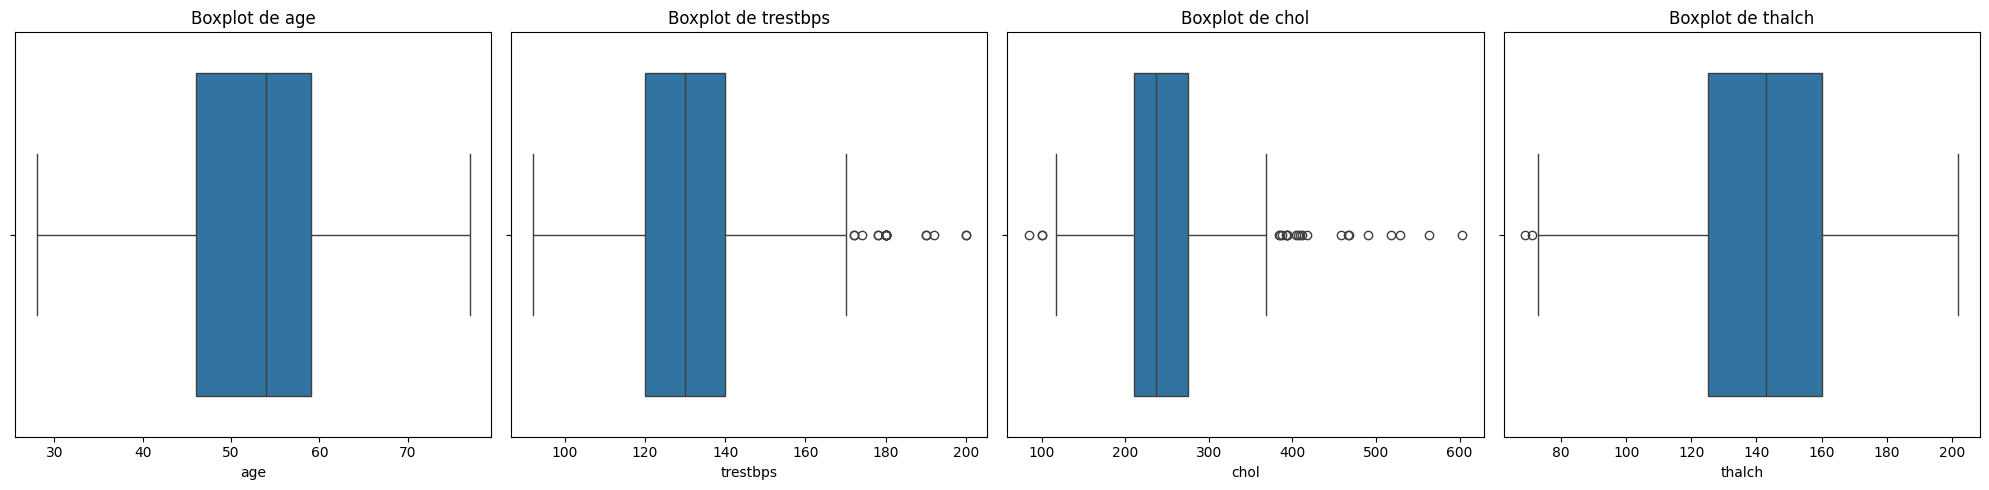

In [73]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Graficar cada boxplot manualmente en su respectivo eje
sns.boxplot(x=df['age'], ax=axes[0])
axes[0].set_title('Boxplot de age')

sns.boxplot(x=df['trestbps'], ax=axes[1])
axes[1].set_title('Boxplot de trestbps')

sns.boxplot(x=df['chol'], ax=axes[2])
axes[2].set_title('Boxplot de chol')

sns.boxplot(x=df['thalch'], ax=axes[3])
axes[3].set_title('Boxplot de thalch')

plt.tight_layout()
plt.show()

# age : No se visualizan valores atípicos
# trestbps y chol: Valores igual a 0, no es compatible con la vida, puede ser error de digitación, los demás valores los dejaré pues en enfermedades cardiacas es probable que los pacientes tengan problemas de presión y/o colesterol.
# Thalch: Mantendré los valores, pues dado el origen de la data, el valor cercano a 60, puede ser por dolencia de enfermedades cardiacas


# trestbps : Presión arterial en reposo (mm Hg)

In [65]:
df = df[df['trestbps'] != 0]

# chol: Colesterol

In [66]:
df = df[df['chol'] != 0]

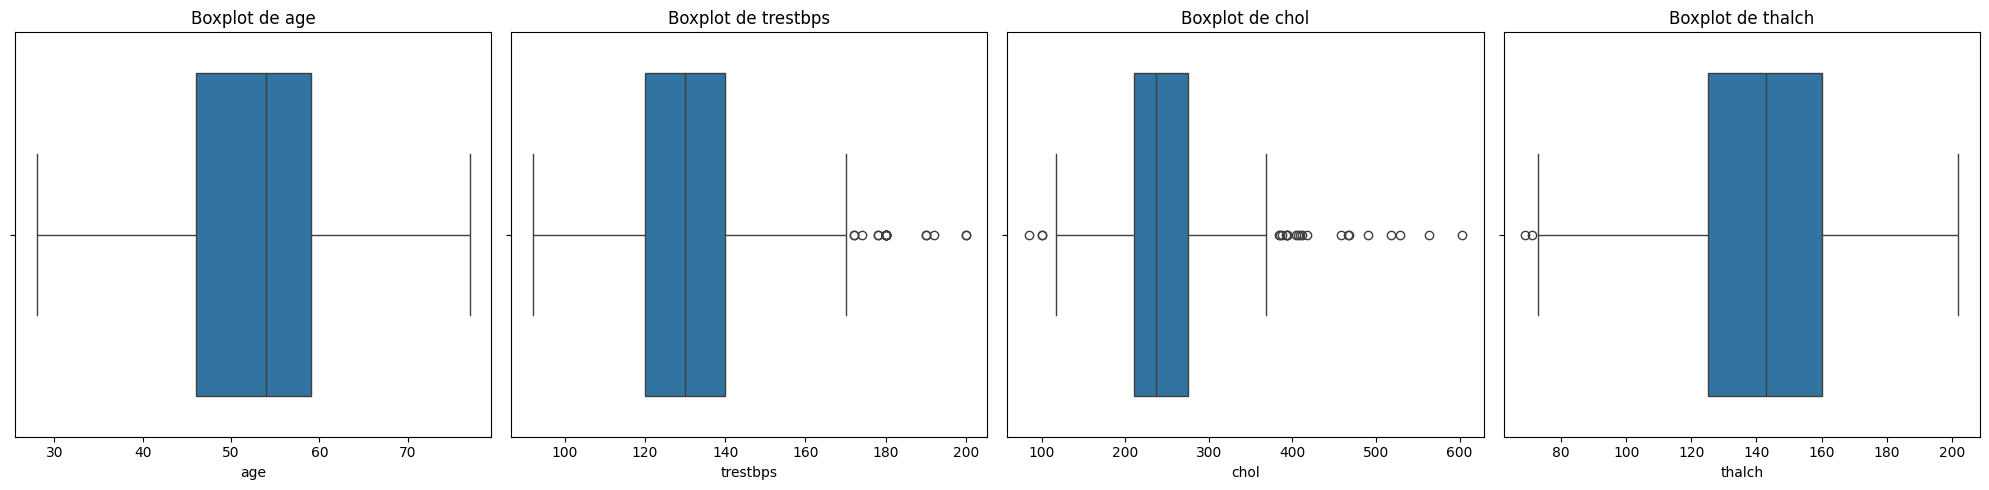

In [67]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Graficar cada boxplot manualmente en su respectivo eje
sns.boxplot(x=df['age'], ax=axes[0])
axes[0].set_title('Boxplot de age')

sns.boxplot(x=df['trestbps'], ax=axes[1])
axes[1].set_title('Boxplot de trestbps')

sns.boxplot(x=df['chol'], ax=axes[2])
axes[2].set_title('Boxplot de chol')

sns.boxplot(x=df['thalch'], ax=axes[3])
axes[3].set_title('Boxplot de thalch')

plt.tight_layout()
plt.show()

# **<font color="blue">Correlación de variables numéricas con heatmap</font>**

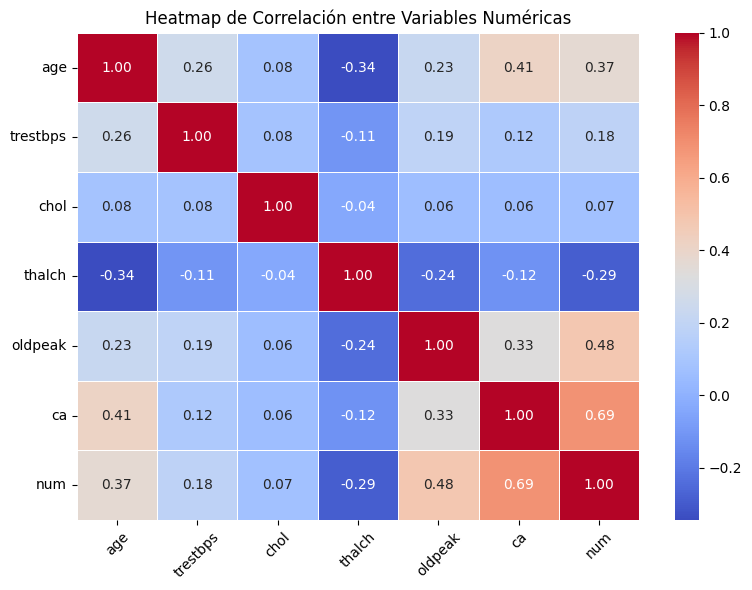

In [71]:
df_corr = df.drop(['id'], axis=1)

# Calcular matriz de correlación solo para columnas numéricas
correlation_matrix = df_corr.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Títulos y etiquetas
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [75]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


## **la única variable que parece no tener relación es thalch**

### Exporto el dataset para tener la versión limpia, despues del proceso de análisis realizado.

In [69]:
path ='/content/drive/MyDrive/Bootcamp-ML/Cores/core_xgboost/heart_disease_uci_clean.csv'


df.to_csv(path,index=False)